In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


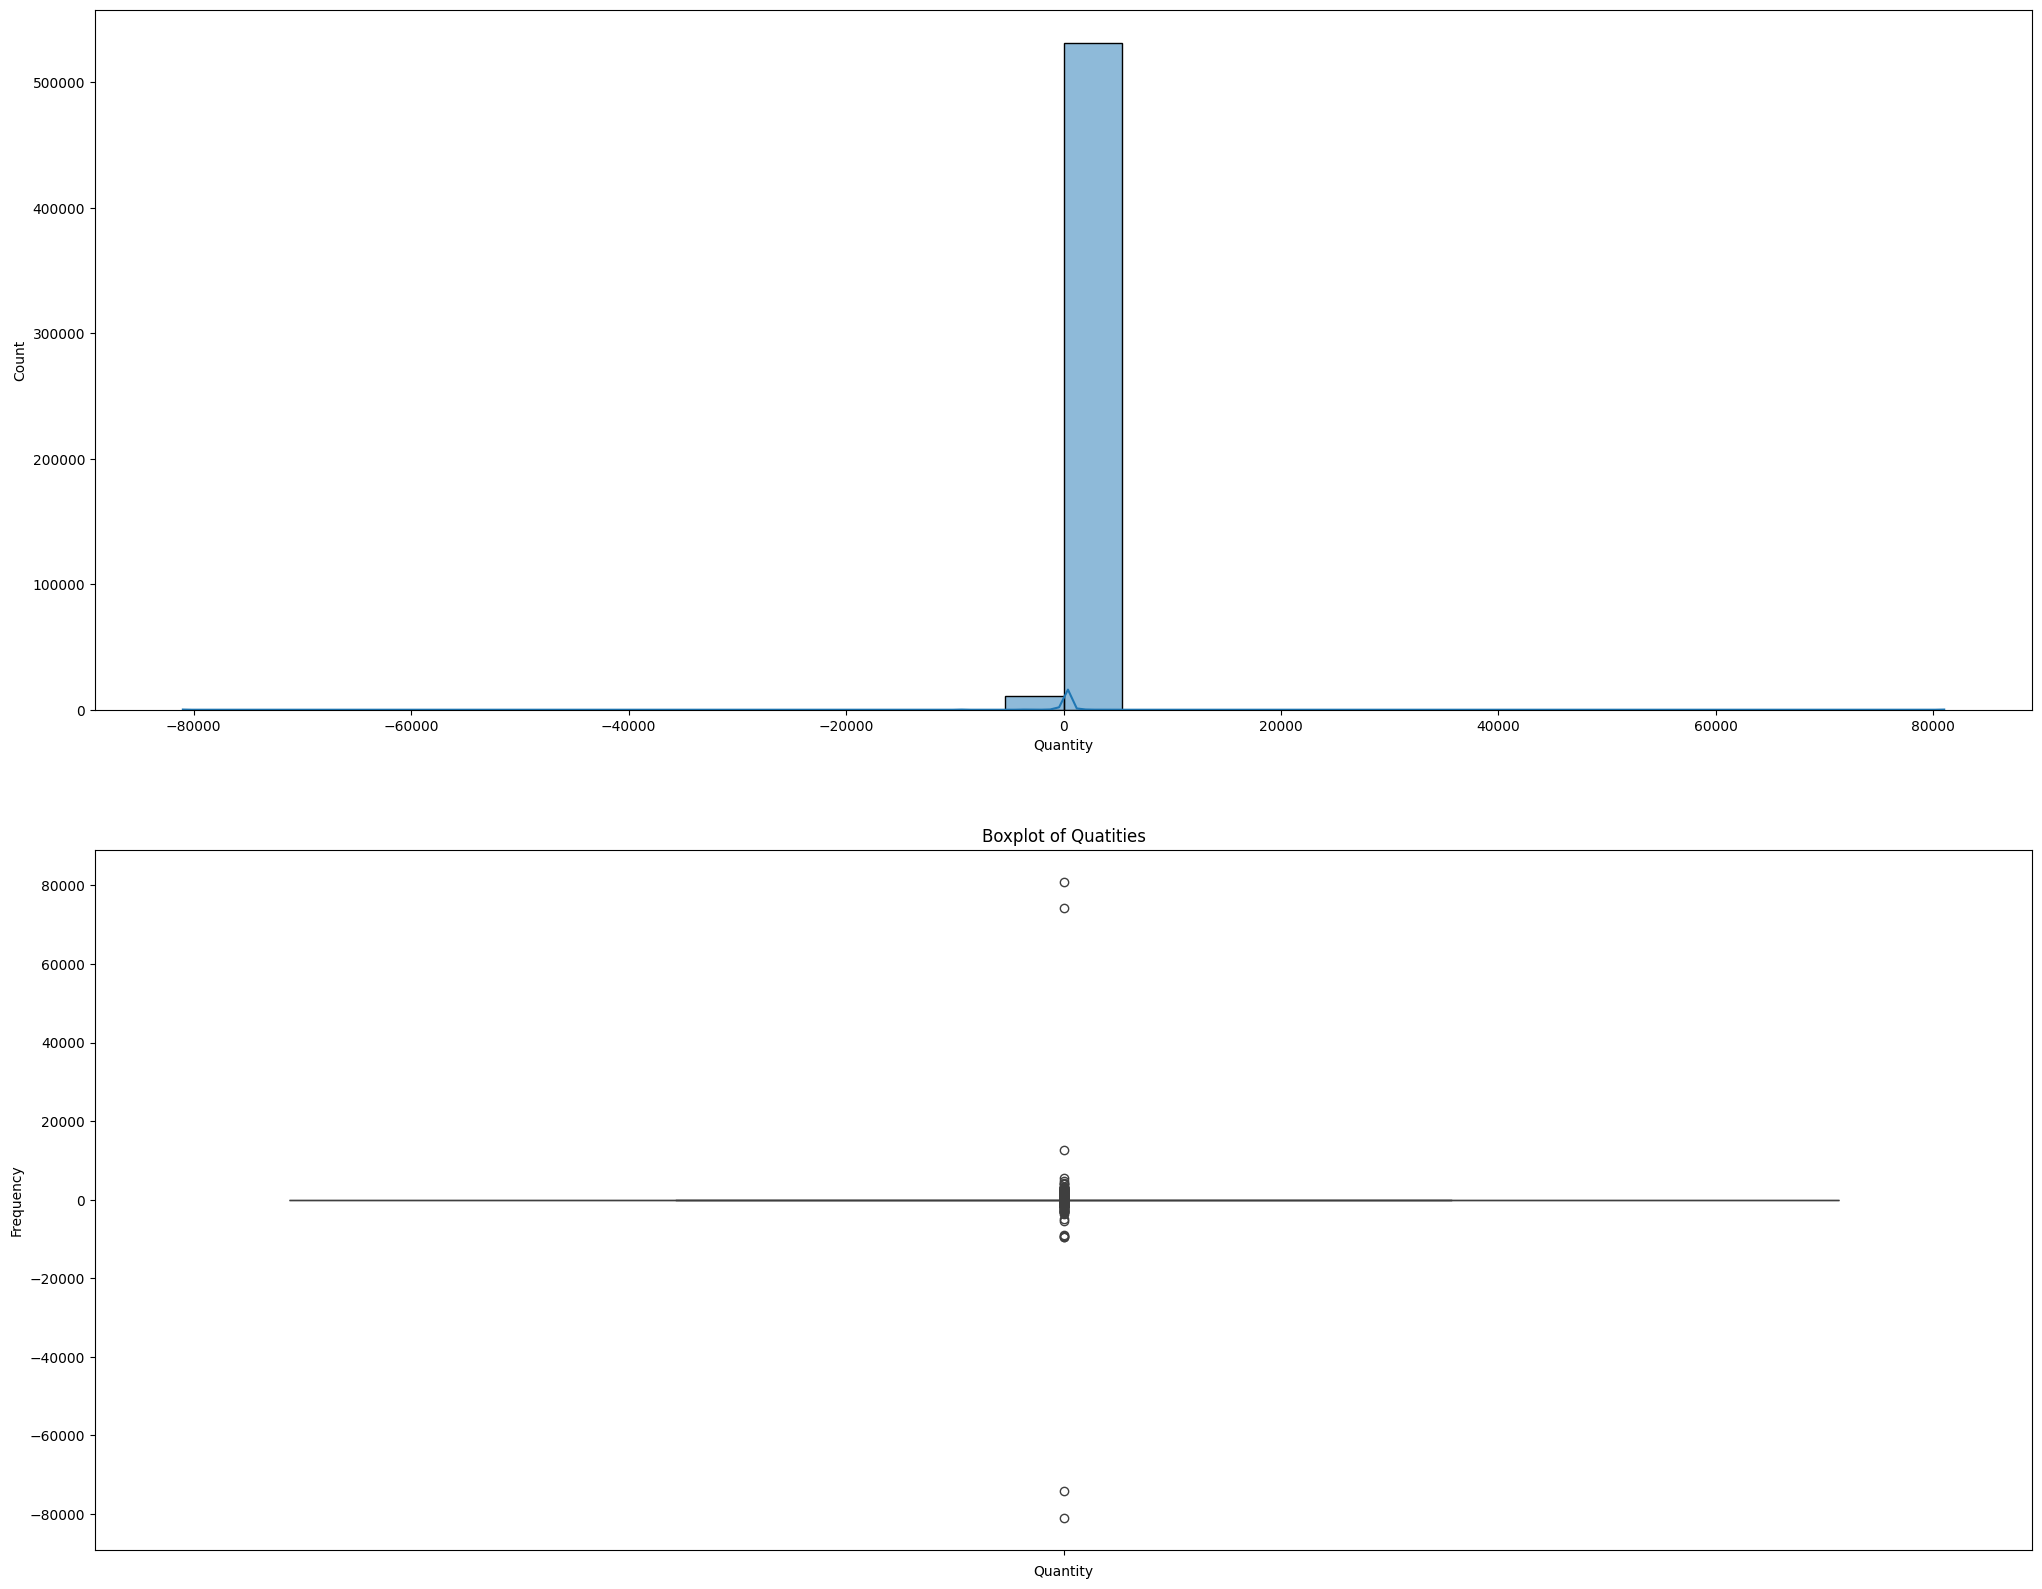

In [5]:
_, axes = plt.subplots(2,1 , figsize=(25,20))

sns.histplot(data['Quantity'], bins=30, kde=True, ax=axes[0])
plt.title('Distribution of Quatities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

sns.boxplot(data['Quantity'], ax=axes[1])
plt.title('Boxplot of Quatities')
plt.xlabel('Quantity')


plt.show()

In [6]:
quantity_counts = pd.Series(data['Quantity'].value_counts())
quantity_counts.head(20)

Quantity
 1      148227
 2       81829
 12      61063
 6       40868
 4       38484
 3       37121
 24      24021
 10      22288
 8       13129
 5       11757
 48       6068
 25       5124
 20       5019
 16       4266
-1        4184
 36       3822
 7        2914
 9        2037
 72       1946
 100      1819
Name: count, dtype: int64

In [8]:
data = data[(data['Quantity'] >= 0) & (data['Quantity'] <= 25)]


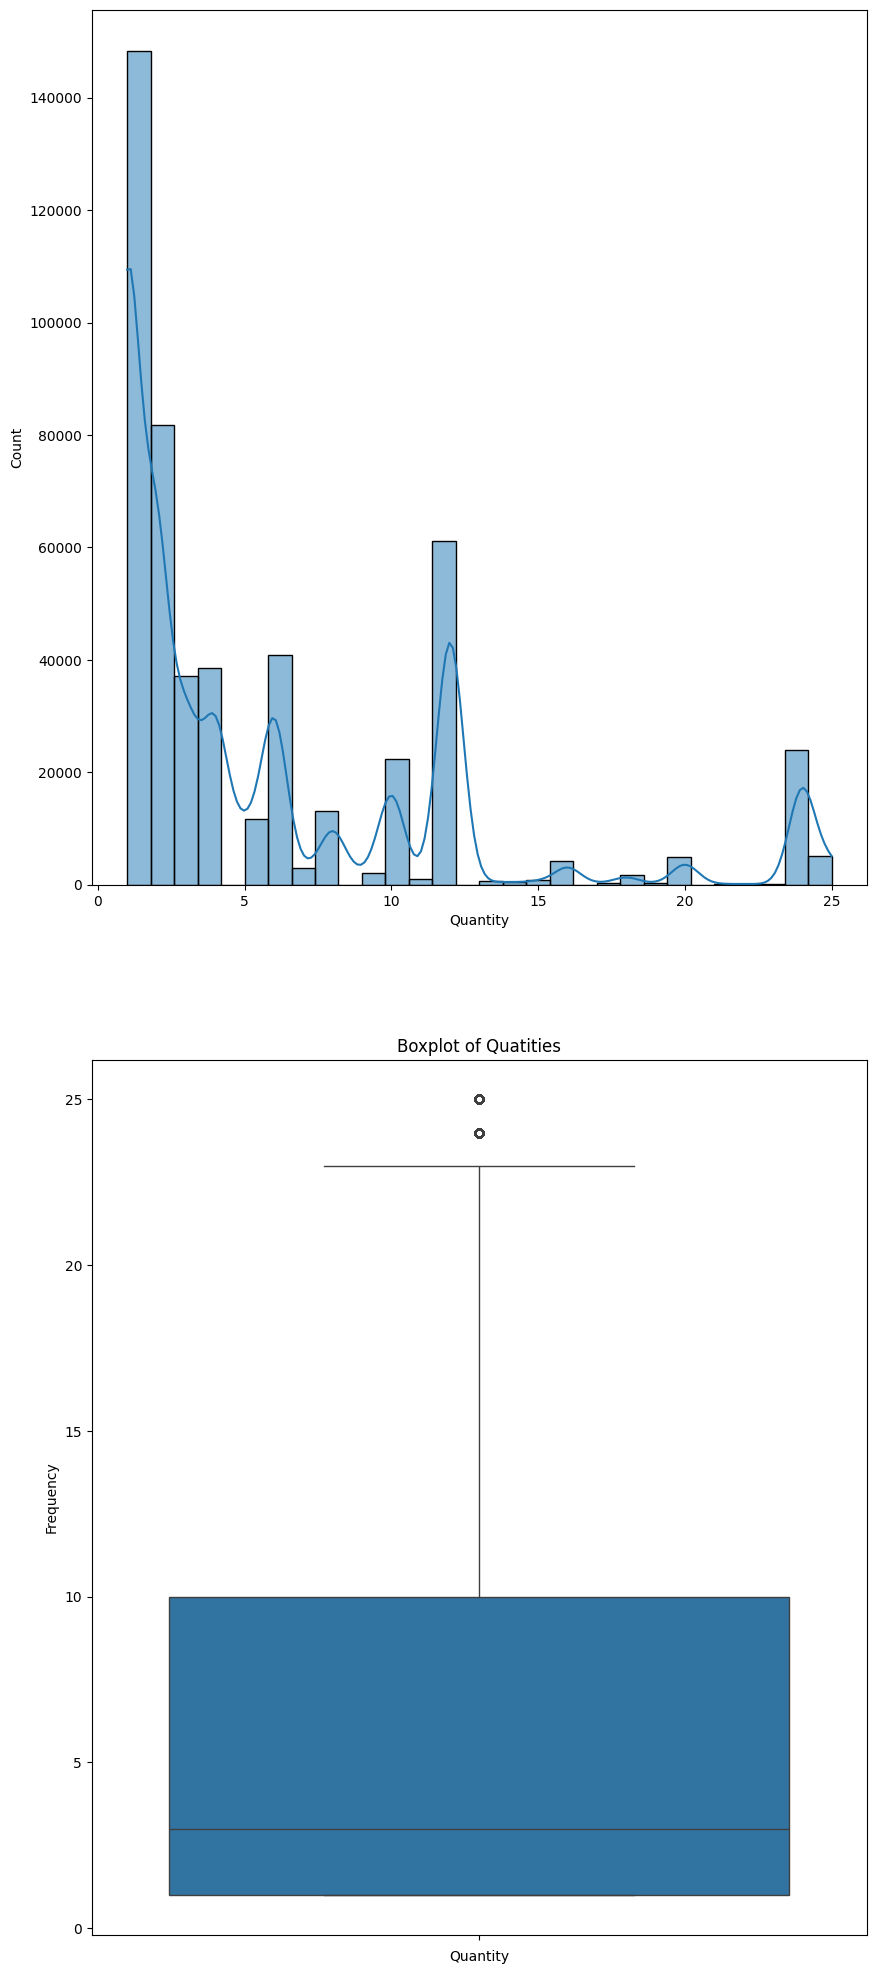

In [9]:
_, axes = plt.subplots(2,1 , figsize=(10, 25))

sns.histplot(data['Quantity'], bins=30, kde=True, ax=axes[0])
plt.title('Distribution of Quatities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

sns.boxplot(data['Quantity'], ax=axes[1])
plt.title('Boxplot of Quatities')
plt.xlabel('Quantity')


plt.show()